In [6]:
import numpy as np          # numerical Operation on data
import pandas as pd         # Data manipulation Operations on data like replacing null or nan and data description
import pickle               # For saving data in file
import warnings             
from sklearn.svm import SVC     
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures, RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, RFE, RFECV, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sn

In [34]:
df = pd.read_csv("Sample.csv")
df.head(1)

,Gender,10th board,10th marks,12th board,12th marks,Stream,Cgpa,Internships(Y/N),Training(Y/N),Backlogs,Innovative Project(Y/N),Communication level,Technical Course(Y/N),codingComptation,Internships,Projects,AMCAT_Total_Marks,Placement(Y/N)?
0,Female,State Board,96.7,CBSE,70.2,Mechanical Engineering,7.37,No,Yes,No,No,3,Yes,No,1,1,600,Not Placed


In [4]:
df.describe

<bound method NDFrame.describe of      Gender   10th board  10th marks         12th board  12th marks  \
0    Female  State Board        96.7               CBSE        70.2   
1    Female        WBBSE        96.2             WBCHSE        90.6   
2      Male  State Board        97.5               CBSE        69.6   
3    Female         CBSE        96.9  Other state Board        77.6   
4    Female         ICSE        99.1               CBSE        62.8   
..      ...          ...         ...                ...         ...   
396  Female         ICSE        88.8               CBSE        89.1   
397  Female  State Board        86.7               CBSE        86.7   
398    Male         CBSE        83.5               CBSE        61.1   
399    Male         ICSE        99.8                ISE        75.4   
400    Male        WBBSE        94.2               CBSE        90.0   

                                        Stream  Cgpa Internships(Y/N)  \
0                       Mechanical Engin

In [7]:
df.isnull().sum()

Gender                     0
10th board                 0
10th marks                 0
12th board                 0
12th marks                 0
Stream                     0
Cgpa                       0
Internships(Y/N)           0
Training(Y/N)              0
Backlogs                   0
Innovative Project(Y/N)    0
Communication level        0
Technical Course(Y/N)      0
codingComptation           0
Internships                0
Projects                   0
AMCAT_Total_Marks          0
Placement(Y/N)?            0
dtype: int64

In [8]:
print(df.describe())

       10th marks  12th marks        Cgpa  Communication level  Internships  \
count  401.000000  401.000000  401.000000           401.000000   401.000000   
mean    84.512718   78.798828    8.467855             2.922693     1.059850   
std      9.779359   10.418821    4.154455             1.378952     0.660613   
min     32.000000   45.000000    5.500000             1.000000     0.000000   
25%     77.600000   70.000000    7.620000             2.000000     1.000000   
50%     85.200000   80.500000    8.270000             3.000000     1.000000   
75%     92.000000   87.300000    8.940000             4.000000     1.000000   
max    100.000000   97.000000   90.000000             5.000000     2.000000   

         Projects  AMCAT_Total_Marks  
count  401.000000         401.000000  
mean     1.987531         552.004988  
std      0.844005          95.615166  
min      1.000000         226.000000  
25%      1.000000         485.000000  
50%      2.000000         556.000000  
75%      3.0000

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
categorical_cols = [
    'Gender', '10th board', '12th board', 'Stream',
    'Internships(Y/N)', 'Training(Y/N)', 'Backlogs',
    'Innovative Project(Y/N)', 'Technical Course(Y/N)',
    'codingComptation', 'Placement(Y/N)?'
]

# Apply label encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
df

,Gender,10th board,10th marks,12th board,12th marks,Stream,Cgpa,Internships(Y/N),Training(Y/N),Backlogs,Innovative Project(Y/N),Communication level,Technical Course(Y/N),codingComptation,Internships,Projects,AMCAT_Total_Marks,Placement(Y/N)?
0,0,2,96.7,1,70.2,14,7.37,0,1,0,0,3,1,0,1,1,600,0
1,0,3,96.2,10,90.6,10,9.35,0,0,0,1,4,0,1,0,3,536,0
2,1,2,97.5,1,69.6,13,7.84,0,1,0,1,3,1,1,1,2,615,1
3,0,0,96.9,8,77.6,4,7.87,1,0,1,1,2,1,1,1,1,702,0
4,0,1,99.1,1,62.8,3,9.26,1,1,0,1,1,1,1,1,2,527,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0,1,88.8,1,89.1,3,8.34,1,1,0,0,1,1,0,1,1,379,0
397,0,2,86.7,1,86.7,3,7.77,1,0,0,1,2,1,1,1,3,685,1
398,1,0,83.5,1,61.1,6,8.85,0,0,0,1,1,1,0,1,1,539,1
399,1,1,99.8,6,75.4,10,7.89,1,1,1,1,5,1,1,0,1,674,0


In [19]:
X = df.drop('Placement(Y/N)?',axis=1)
y = df['Placement(Y/N)?']
print(X.columns)

Index(['Gender', '10th board', '10th marks', '12th board', '12th marks',
       'Stream', 'Cgpa', 'Internships(Y/N)', 'Training(Y/N)', 'Backlogs',
       'Innovative Project(Y/N)', 'Communication level',
       'Technical Course(Y/N)', 'codingComptation', 'Internships', 'Projects',
       'AMCAT_Total_Marks'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split

       10th marks  12th marks        Cgpa  Communication level  Internships  \
count  401.000000  401.000000  401.000000           401.000000   401.000000   
mean    84.512718   78.798828    8.467855             2.922693     1.059850   
std      9.779359   10.418821    4.154455             1.378952     0.660613   
min     32.000000   45.000000    5.500000             1.000000     0.000000   
25%     77.600000   70.000000    7.620000             2.000000     1.000000   
50%     85.200000   80.500000    8.270000             3.000000     1.000000   
75%     92.000000   87.300000    8.940000             4.000000     1.000000   
max    100.000000   97.000000   90.000000             5.000000     2.000000   

         Projects  AMCAT_Total_Marks  
count  401.000000         401.000000  
mean     1.987531         552.004988  
std      0.844005          95.615166  
min      1.000000         226.000000  
25%      1.000000         485.000000  
50%      2.000000         556.000000  
75%      3.0000

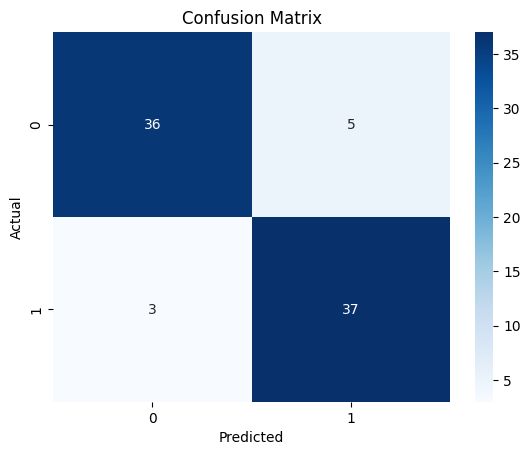

In [15]:
import numpy as np
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import matplotlib.pyplot as plt
import seaborn as sn

# Load data
df = pd.read_csv("Sample.csv")
print(df.describe())
print(df.isnull().sum())

# Encode categorical columns
le = LabelEncoder()
categorical_cols = [
    'Gender', '10th board', '12th board', 'Stream',
    'Internships(Y/N)', 'Training(Y/N)', 'Backlogs',
    'Innovative Project(Y/N)', 'Technical Course(Y/N)',
    'codingComptation', 'Placement(Y/N)?'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature-target split
X = df.drop('Placement(Y/N)?', axis=1)
y = df['Placement(Y/N)?']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Pipeline with preprocessing and model
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),                                  # Scaling
    ('feature_selection', SelectKBest(mutual_info_classif, k=10)), # Feature selection
    ('smote', SMOTE(random_state=42)),                             # Handle imbalance
    ('pca', PCA(n_components=0.95, random_state=42)),              # Dimensionality reduction
    ('classifier', SVC())                                          # Classifier
])

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train model
grid_search.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
print("\nBest Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sn.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save model
with open("svm_model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv("Sample.csv")

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop("Placement(Y/N)?", axis=1)
y = df["Placement(Y/N)?"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features)
])

# Decision Tree pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# GridSearch
param_grid = {
    'classifier__criterion': ['entropy'],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Results
y_pred = grid_search.predict(X_test)
print("Best Params:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.40      0.43        40
           1       0.48      0.54      0.51        41

    accuracy                           0.47        81
   macro avg       0.47      0.47      0.47        81
weighted avg       0.47      0.47      0.47        81



Normal LSTM

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

# Load and encode
df = pd.read_csv("Sample.csv")
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Features and labels
X = df.drop("Placement(Y/N)?", axis=1).values
y = df["Placement(Y/N)?"].values

# One-hot encode target
y = to_categorical(y)

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for Conv1D/LSTM: (samples, time_steps, features=1)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN + LSTM model
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

# Predict & Evaluate
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 16, 64)            192       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 2)                 66        
                                                      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv("Sample.csv")

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop("Placement(Y/N)?", axis=1)
y = df["Placement(Y/N)?"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Numeric transformer pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features)
])

# Pipeline with Decision Tree
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# GridSearchCV
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search_Decision = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search_Decision.fit(X_train, y_train)

# Prediction and evaluation on test set
y_pred = grid_search_Decision.predict(X_test)
print("Best Params:", grid_search_Decision.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ------------------------------------------------------------
# Now perform 10-Fold CV on full data using best estimator
# ------------------------------------------------------------
print("\nApplying 10-Fold Cross Validation on Best Estimator...")

# Refit entire data for CV
best_pipeline = grid_search_Decision.best_estimator_
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipeline, X, y, cv=kfold, scoring='accuracy')

print("10-Fold CV Accuracies:", cv_scores)
print("Average Accuracy:", cv_scores.mean())


Best Params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.45      0.44        40
           1       0.45      0.44      0.44        41

    accuracy                           0.44        81
   macro avg       0.44      0.44      0.44        81
weighted avg       0.44      0.44      0.44        81


Applying 10-Fold Cross Validation on Best Estimator...
10-Fold CV Accuracies: [0.53658537 0.675      0.45       0.55       0.55       0.475
 0.55       0.45       0.575      0.55      ]
Average Accuracy: 0.5361585365853658


In [19]:
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf

# Define again
X = df.drop("Placement(Y/N)?", axis=1).values
y = df["Placement(Y/N)?"].values
y = to_categorical(y)
X = scaler.fit_transform(X)
X = X.reshape((X.shape[0], X.shape[1], 1))

# K-Fold setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []

for train_idx, test_idx in kfold.split(X, np.argmax(y, axis=1)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Rebuild model inside loop
    model = Sequential([
        Conv1D(64, 2, activation='relu', input_shape=(X.shape[1], 1)),
        MaxPooling1D(2),
        LSTM(64),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit
    model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    acc_scores.append(acc)
    print(f"Fold Accuracy: {acc:.4f}")

print("CNN + LSTM K-Fold Accuracies:", acc_scores)
print("Average Accuracy:", np.mean(acc_scores))


Fold Accuracy: 0.8889
Fold Accuracy: 0.8500
Fold Accuracy: 0.8375
Fold Accuracy: 0.7500
Fold Accuracy: 0.7500
CNN + LSTM K-Fold Accuracies: [0.8888888955116272, 0.8500000238418579, 0.8374999761581421, 0.75, 0.75]
Average Accuracy: 0.8152777791023255
